In [1]:
!pip install pandas spacy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.7 MB/s eta 0:00:08
     ---------------------------------------- 0.1/12.8 MB 2.1 MB/s eta 0:00:06
      --------------------------------------- 0.2/12.8 MB 2.1 MB/s eta 0:00:07
     - -------------------------------------- 0.3/12.8 MB 2.1 MB/s eta 0:00:06
     - -------------------------------------- 0.5/12.8 MB 2.5 MB/s eta 0:00:06
     - -------------------------------------- 0.6/12.8 MB 2.7 MB/s eta 0:00:05
     -- ------------------------------------- 0.7/12.8 MB 2.5 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/12.8 MB 2.6 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.8 MB 2.7 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.8 MB 2.5 MB/s eta 0:00:05
     --- ------------------------------------ 1.2/12.8 MB 2.6 MB/s eta 0:00:05
     --- ------------------------------------ 1.2/12.8 MB 2

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# imports
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

# silence warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# increase column width
pd.set_option('display.max_colwidth', 100)

# execution time
from timeit import default_timer as timer
from datetime import timedelta

# dumping models to files
import os
from joblib import dump

In [3]:
df = pd.read_excel('Cleaned_Items.xlsx')

In [4]:
df.head()

,Id,UserId,Description,Name,Daily Price,Gender,Location,Age
0,001304dc-16d8-4e8a-94b8-b45efe90132c,7f1bb6d8-49a0-40a7-9c82-ba8559fcd1e2,"6 A/h Milwaukee battery , fits all m12 tools.",Milwaukee m12 battery,3.50,NaN,Manningtree,38
1,001e683b-ec4e-4ff9-ab13-e977cf823bae,5bfa9cd3-107e-43ae-a1c3-5ce630e5cdbf,"Tooltec pressure washer and spot blasting equipment.\n\nGreat condition, easy to use.",Tooltec Pressure Washer,10.00,male,London,41
2,0055282c-8f7e-41e6-919c-6cddb4e5cbb4,03a65355-5555-419b-8127-d9d7e7139ae3,Profoto OCF Barndoors\n\nComes with carry case. For use on all Profoto OCF and RFi strobes.,Profoto OCF Barndoors,4.00,NaN,London,30
3,0062fae2-2e91-4fbd-9bfa-2a5a0659d2ee,d8d9a4c0-636b-40f6-a33f-8a258e59981d,"Cokin Camera Filters Solid and Graduated Filters CPL 58mm\n\nSquare Filters with Adapter, case a...",12 Filter lenses Cokin Solid colour Graduated Filters and CPL 58mm,20.83,female,Newton Abbot,52
4,006d35c9-b9be-4b4b-838a-3170f8629aef,42917d6c-ff68-4eda-b75f-e0501d08a405,Dress only Medium-Large,Mexicana fancy dress,5.00,female,Loughborough,31


In [5]:
df.drop(columns=['Id', 'UserId'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  1739 non-null   object 
 1   Name         1739 non-null   object 
 2   Daily Price  1728 non-null   float64
 3   Gender       1183 non-null   object 
 4   Location     1739 non-null   object 
 5   Age          1739 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 81.6+ KB


In [7]:
# Convert appropriate columns to numeric
df['Gender'] = df['Gender'].replace(np.nan, 'unknown')
df['Daily Price'] = pd.to_numeric(df['Daily Price'], errors='coerce')


# Handle missing values
df.fillna(df.mean(), inplace=True)

C:\Users\Asad\AppData\Local\Temp\ipykernel_3700\3476344071.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [8]:
df[['Name']]

,Name
0,Milwaukee m12 battery
1,Tooltec Pressure Washer
2,Profoto OCF Barndoors
3,12 Filter lenses Cokin Solid colour Graduated Filters and CPL 58mm
4,Mexicana fancy dress
...,...
1734,Sony Camcorder
1735,Boat 225f
1736,Sandisk 1TB SSD
1737,Rode Wireless Pro Mic Kit


In [9]:
# Define categories based on keywords
categories = {
    'Baby & toddle items': ['baby', 'toddler', 'car seat', 'stroller', 'bath'],
    'Books, comics & magazines': ['book', 'comic', 'magazine'],
    'Business, office & industrial': ['office', 'industrial', 'business', 'printer', 'scanner'],
    'Cameras & photography': ['camera', 'lens', 'tripod', 'flash', 'reflector', 'gopro'],
    'Cars, motorcycles & vehicles': ['car', 'motorcycle', 'bike', 'vehicle', 'trailer'],
    'Clothes, shoes & accessories': ['dress', 'clothing', 'shoes', 'accessories', 'jacket'],
    'Computers/tablet & networking': ['laptop', 'tablet', 'network', 'router', 'modem'],
    'Crafts': ['craft', 'sewing', 'knitting', 'crochet'],
    'DVDs, film & TV': ['dvd', 'film', 'tv', 'movie'],
    'Everything else': ['test', 'miscellaneous', 'other'],
    'Garden & patio': ['lawn', 'garden', 'patio', 'mower', 'hedge', 'trimmer'],
    'Health & beauty': ['health', 'beauty', 'hair', 'skin', 'cosmetic'],
    'Holidays & travel': ['tent', 'sleeping bag', 'camping', 'luggage', 'travel'],
    'Home, furniture & DIY': ['table', 'chair', 'sofa', 'bed', 'desk', 'furniture'],
    'Jewellery & watches': ['jewellery', 'watch', 'bracelet', 'necklace'],
    'Mobile phones & communication': ['phone', 'mobile', 'smartphone', 'communication'],
    'Music': ['music', 'album', 'cd', 'vinyl'],
    'Musical instruments': ['guitar', 'keyboard', 'piano', 'drum', 'violin'],
    'Pets & livestock': ['pet', 'dog', 'cat', 'livestock'],
    'Pottery, porcelain & glass': ['pottery', 'porcelain', 'glass'],
    'Power tools': ['drill', 'saw', 'mixer', 'hammer', 'wrench'],
    'Sound & vision': ['speaker', 'microphone', 'audio', 'video', 'headphones'],
    'Space': ['space', 'astronomy', 'telescope'],
    'Sporting goods': ['bike', 'kayak', 'golf', 'ski', 'tennis'],
    'Toys & games': ['toy', 'game', 'lego', 'puzzle'],
    'Video games & consoles': ['ps4', 'xbox', 'switch', 'game']
}


# Function to categorize items
def categorize_item(item):
    item_lower = item.lower()
    for category, keywords in categories.items():
        if any(keyword in item_lower for keyword in keywords):
            return category
    return 'Other'

# Apply the categorization function to the items in the 'Name' column
df['Category'] = df['Name'].apply(categorize_item)

# Display the categorized items
print(df)

                                                                                              Description  \
0                                                           6 A/h Milwaukee battery , fits all m12 tools.   
1                   Tooltec pressure washer and spot blasting equipment.\n\nGreat condition, easy to use.   
2             Profoto OCF Barndoors\n\nComes with carry case. For use on all Profoto OCF and RFi strobes.   
3     Cokin Camera Filters Solid and Graduated Filters CPL 58mm\n\nSquare Filters with Adapter, case a...   
4                                                                                 Dress only Medium-Large   
...                                                                                                   ...   
1734  PXW-FS5 4K camcorder with 0.45m to 0.95m lens in study box complete with 2x 128Mb SDHC cards and...   
1735                                                                          In-ear built-in headphone\n   
1736               

In [10]:
# Check for null values
null_values = df.isnull().sum()
print(null_values)

Description    0
Name           0
Daily Price    0
Gender         0
Location       0
Age            0
Category       0
dtype: int64


In [11]:
df['Location'].value_counts()

London                     239
Manningtree                179
Colchester                  77
London                      38
Ipswich                     33
                          ... 
St Austell                   2
April                        1
Winter garden, Fl 34787      1
March                        1
Winter garden, Fl 34788      1
Name: Location, Length: 381, dtype: int64

In [12]:
import re
# Define the standardization function
def standardize_location(location):
    # Convert to lowercase and strip extra spaces
    location = location.strip().lower()
    
    # Remove any numbers at the end of the location name
    location = re.sub(r'\d+$', '', location).strip()
    
    # Known replacements for standardization
    replacements = {
        "london": "London",
        "manningtree": "Manningtree",
        "colchester, essex": "Colchester",
        "colchester": "Colchester",
        "san diego": "San Diego",
        "ipswich": "Ipswich",
        "norwich": "Norwich",
        "manchester": "Manchester",
        "edgware": "Edgware",
        "hemel hempstead": "Hemel Hempstead",
        "st albans": "St Albans",
        "southall": "Southall",
        "birmingham": "Birmingham",
        # Add more mappings as needed
    }
    
    # Replace with standardized names
    standardized_location = replacements.get(location, location.title())
    
    return standardized_location

# Assuming df is your dataframe and 'Location' is the column with location names
df['Location'] = df['Location'].apply(standardize_location)

In [13]:
df['Location'].value_counts()

London         287
Manningtree    191
Colchester      84
Ipswich         45
Norwich         30
              ... 
Leigh            2
St Austell       2
Witherslack      2
March            1
April            1
Name: Location, Length: 321, dtype: int64

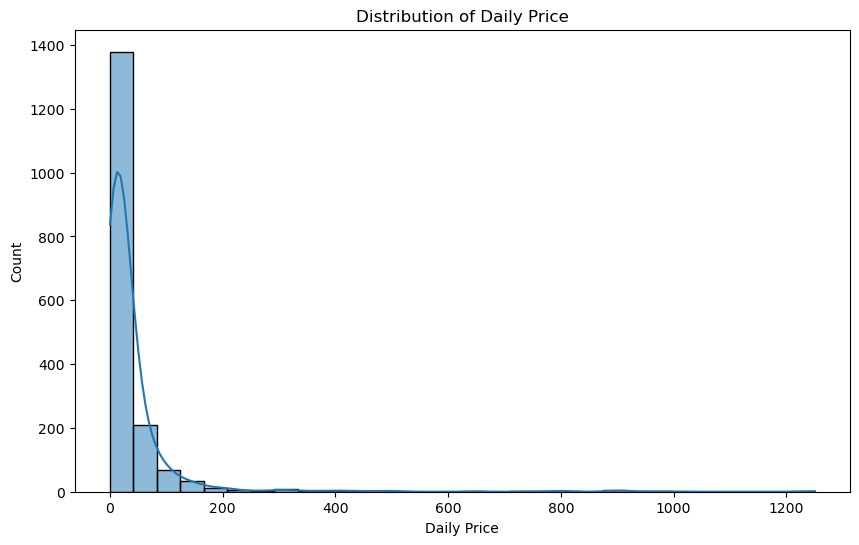

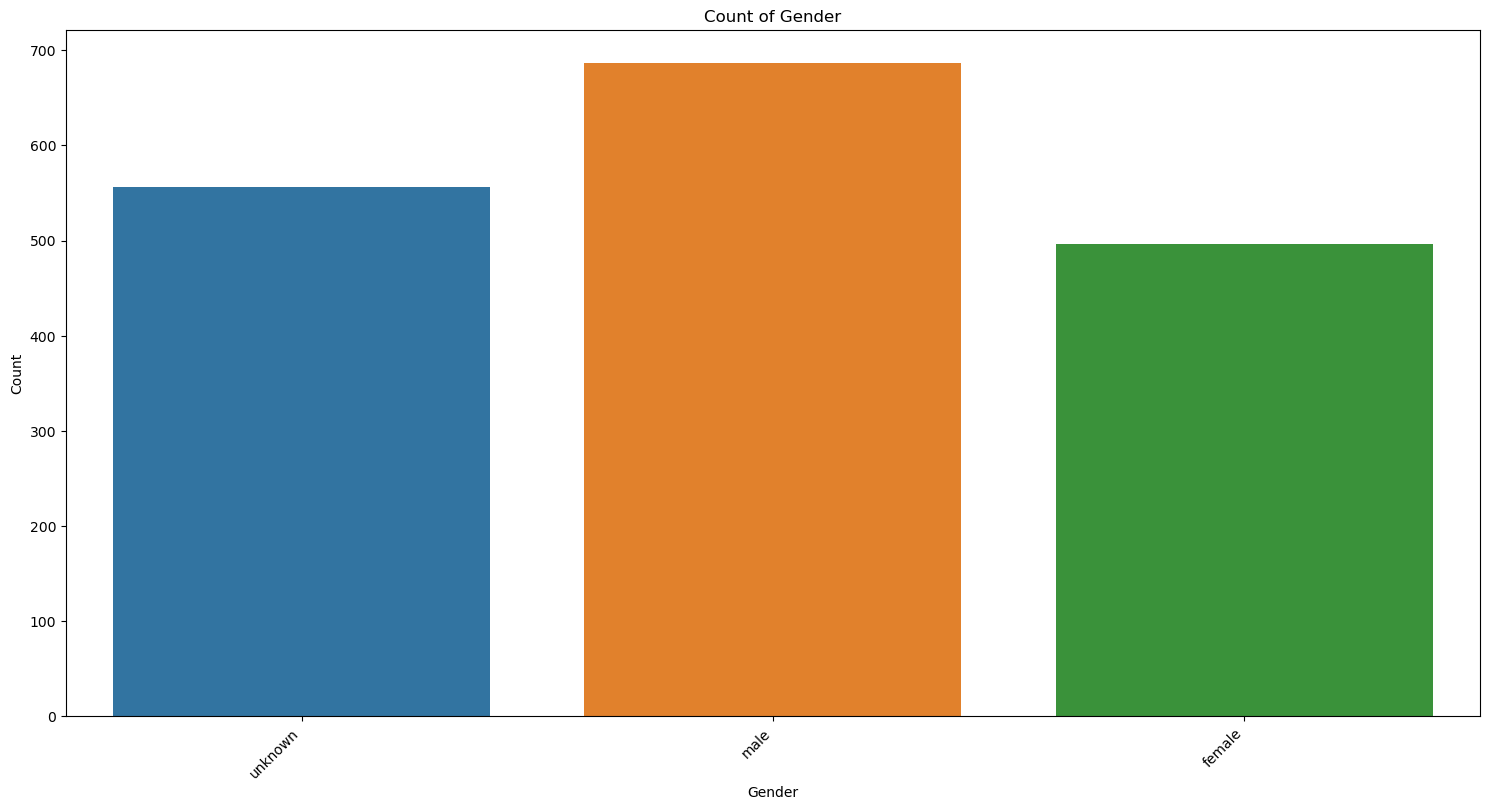

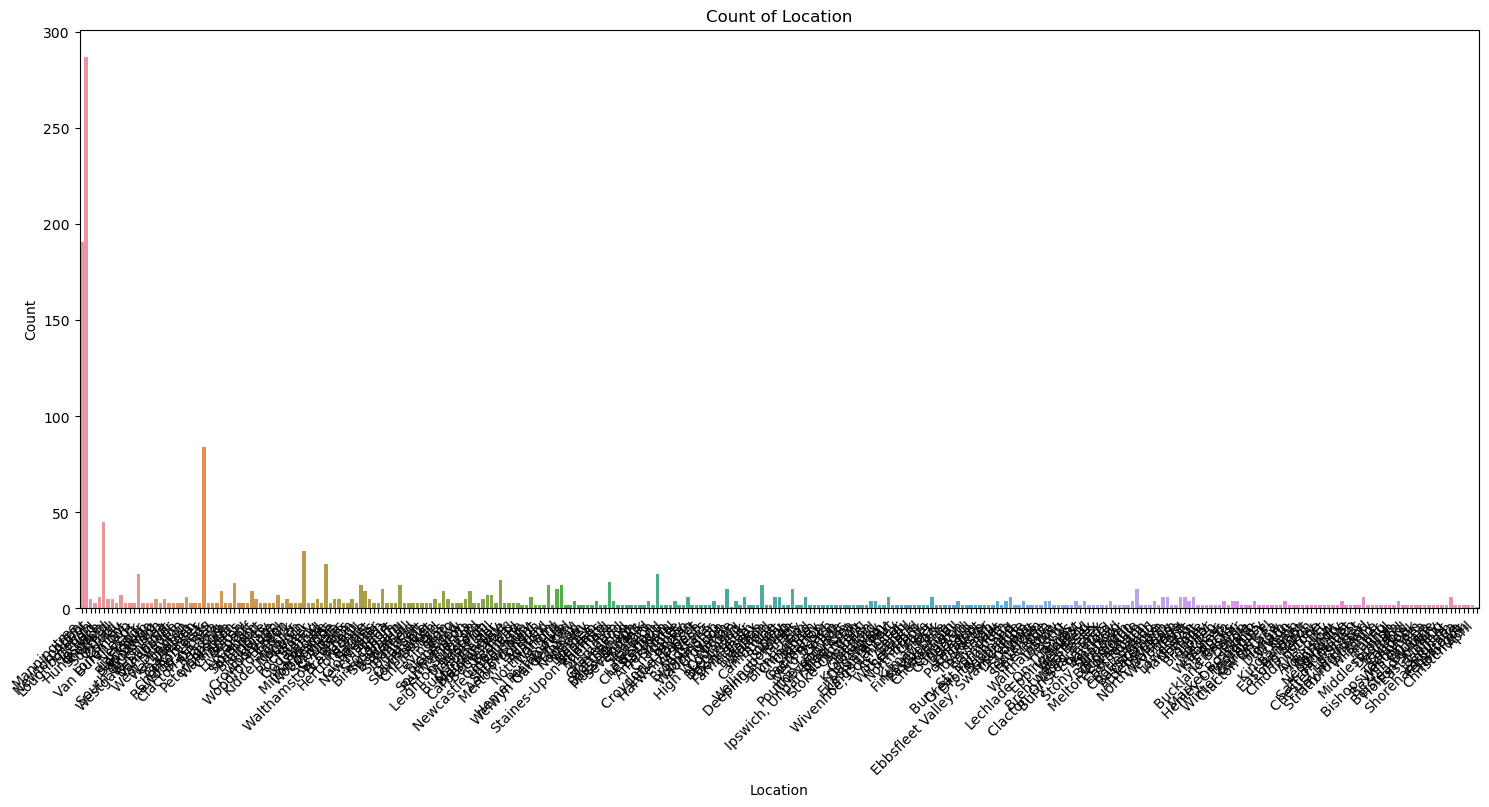

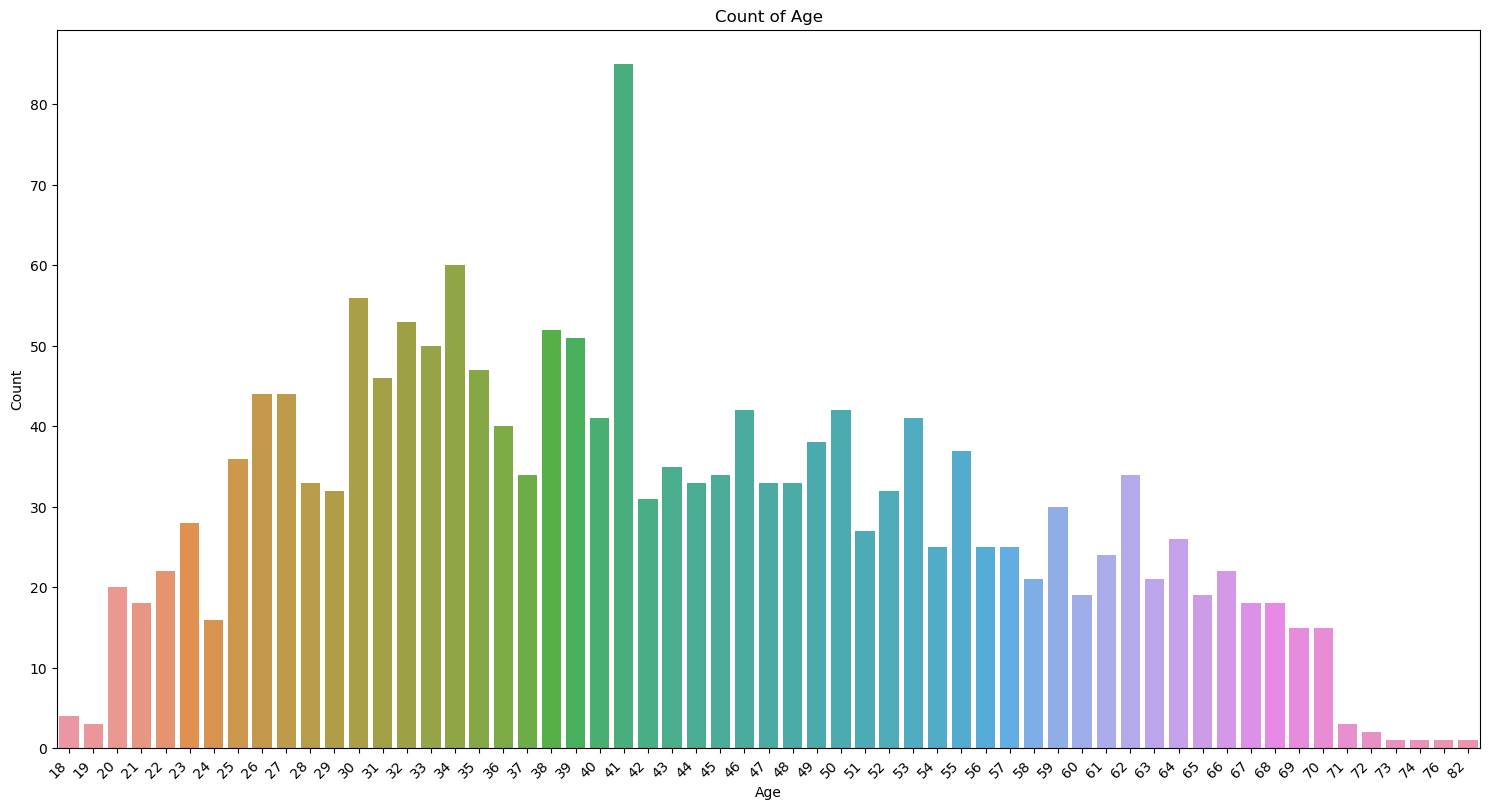

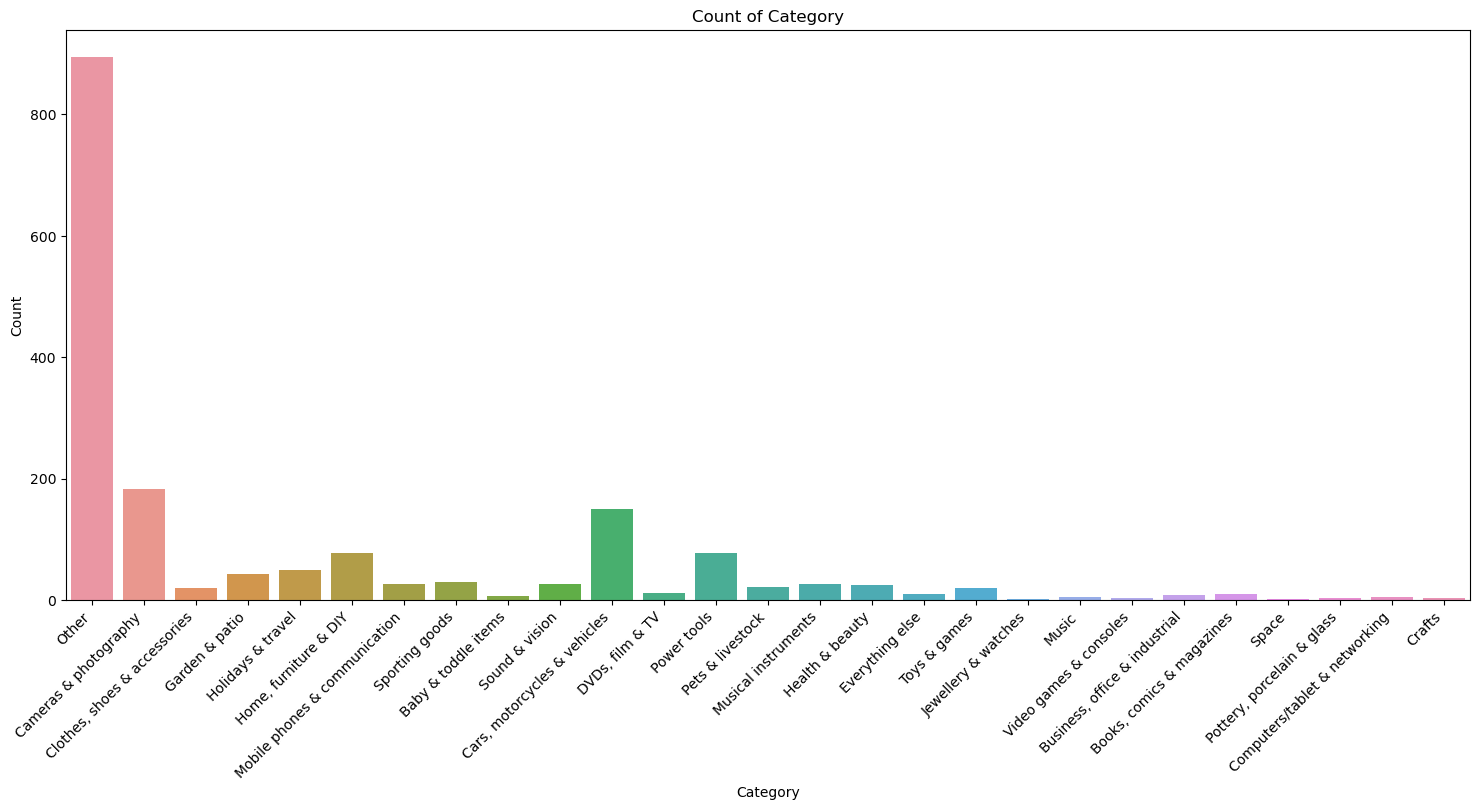

In [14]:
# Histograms for numerical columns
numerical_cols = ['Daily Price']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Count plots for categorical columns
categorical_cols = ['Gender', 'Location', 'Age','Category']

for col in categorical_cols:
    plt.figure(figsize=(15, 8))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.tight_layout()  # Adjust layout to fit x-axis labels
    plt.title(f'Count of {col}')
    plt.show()


In [15]:
# Remove outliers where 'Daily Price' > 200 and location.valuecounts <20
df = df[df['Daily Price'] <= 200]

location_counts = df['Location'].value_counts()
valid_locations = location_counts[location_counts >= 20].index
df = df[df['Location'].isin(valid_locations)]

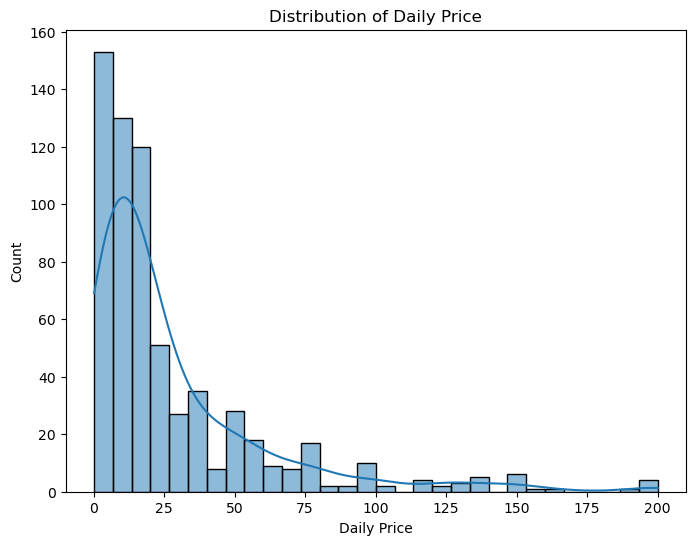

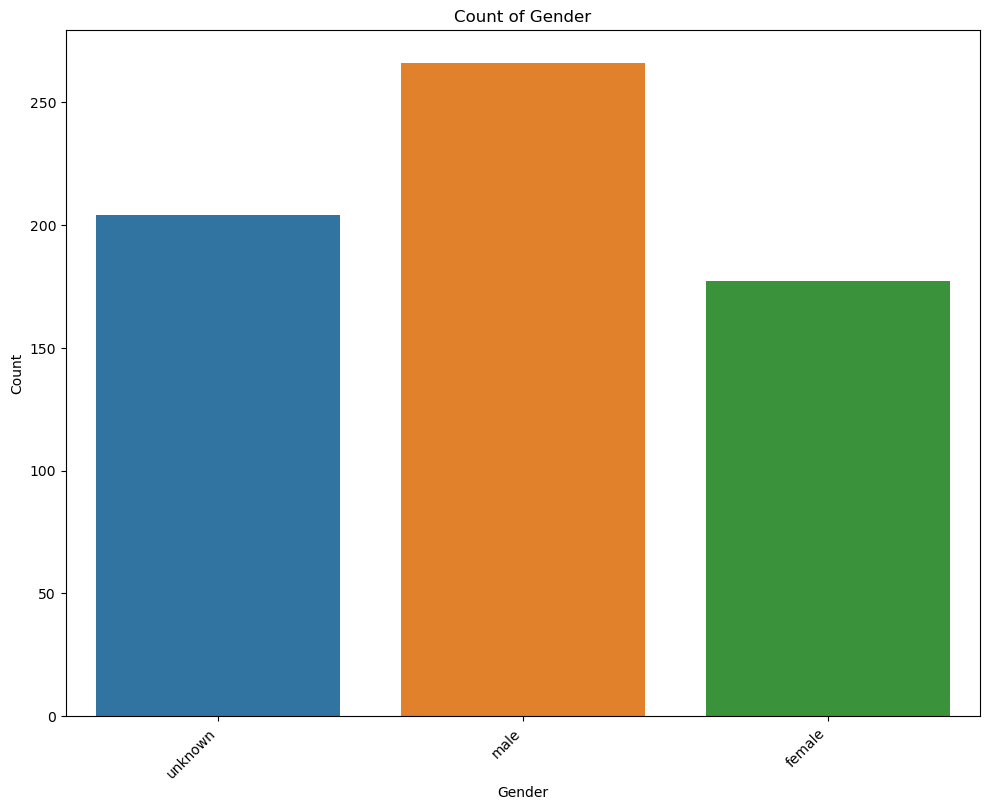

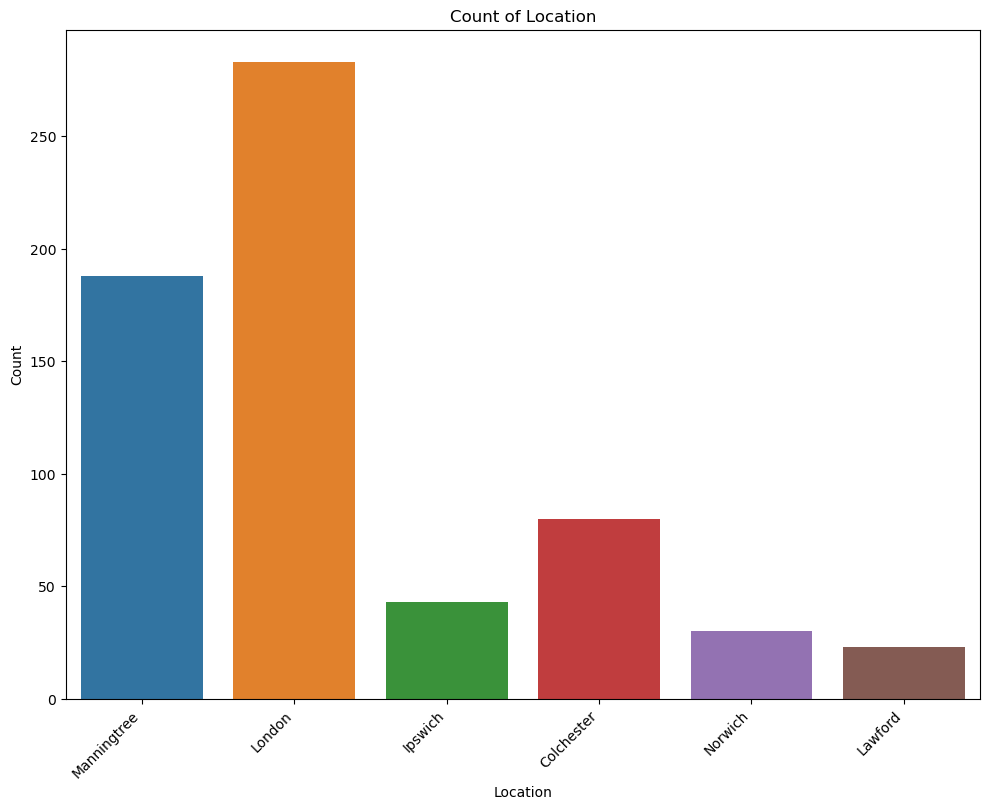

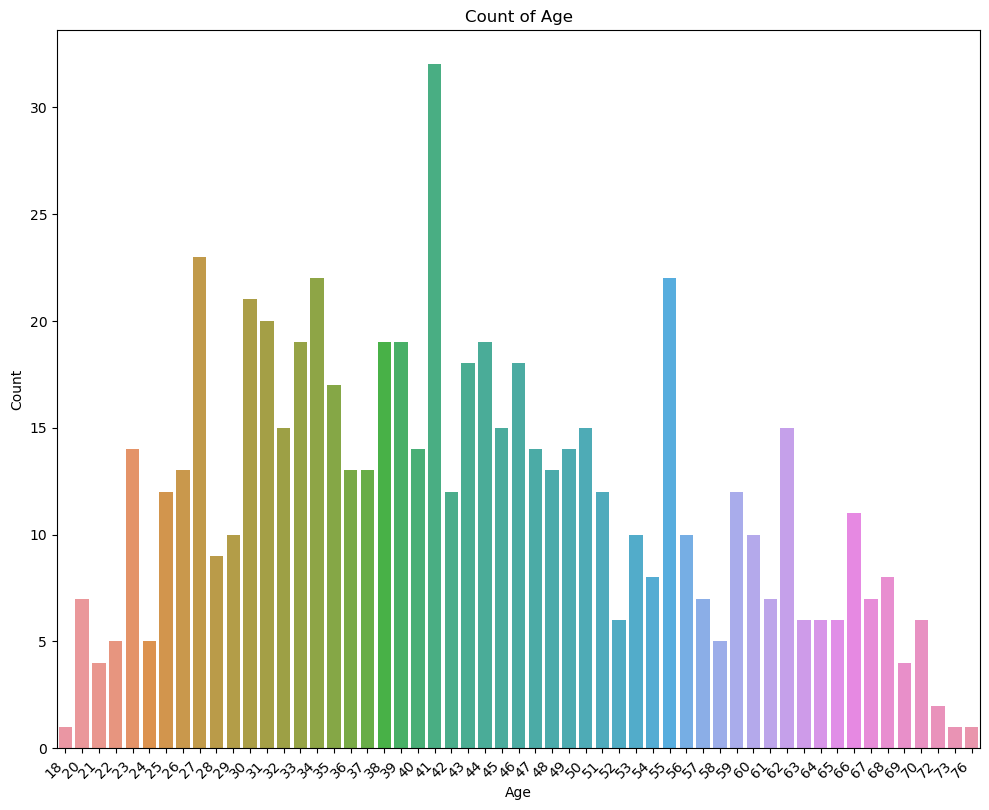

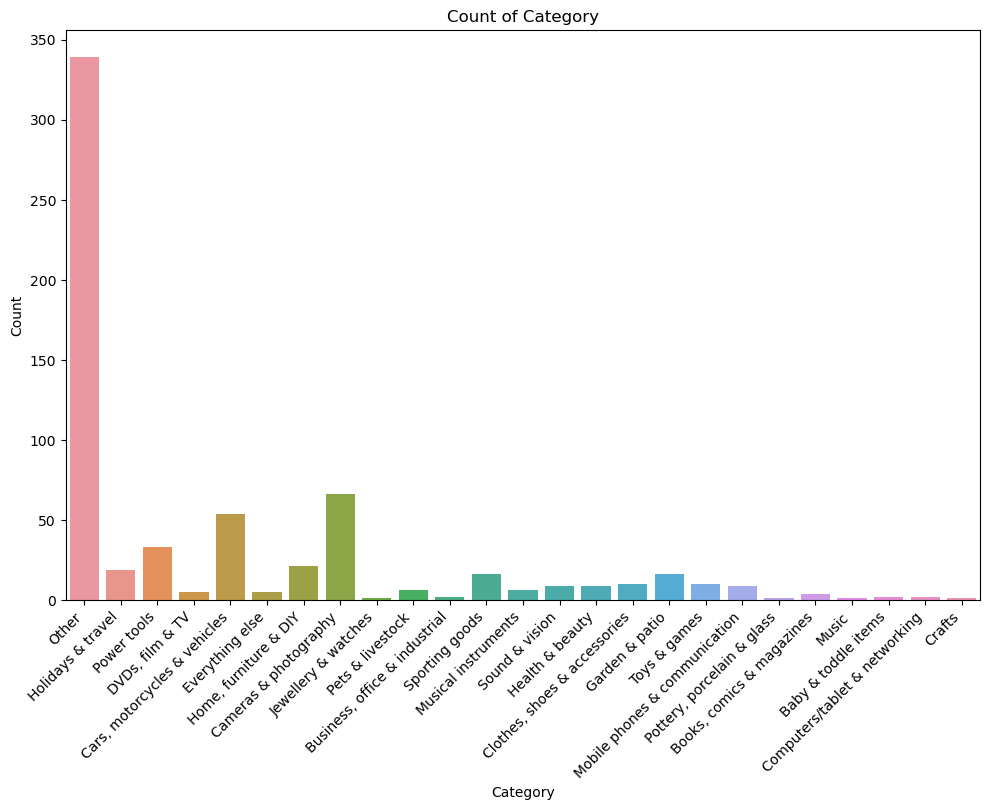

In [16]:
# Histograms for numerical columns
numerical_cols = ['Daily Price']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Count plots for categorical columns
categorical_cols = ['Gender', 'Location', 'Age','Category']

for col in categorical_cols:
    plt.figure(figsize=(10, 8))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.tight_layout()  # Adjust layout to fit x-axis labels
    plt.title(f'Count of {col}')
    plt.show()


C:\Users\Asad\AppData\Local\Temp\ipykernel_3700\4221789457.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


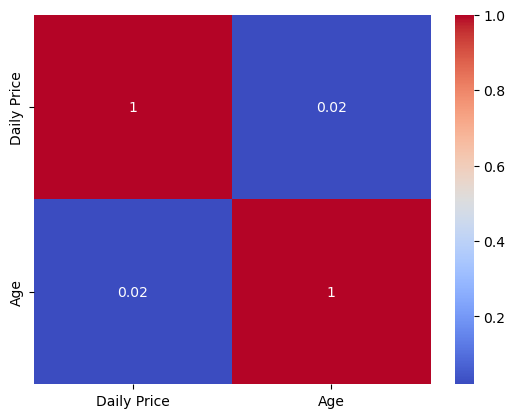

In [17]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [18]:
# Step 1: Identify the categorical columns for which you want to create dummy variables
# Convert categorical variables into numerical ones
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Category'] = label_encoder.fit_transform(df['Category'])

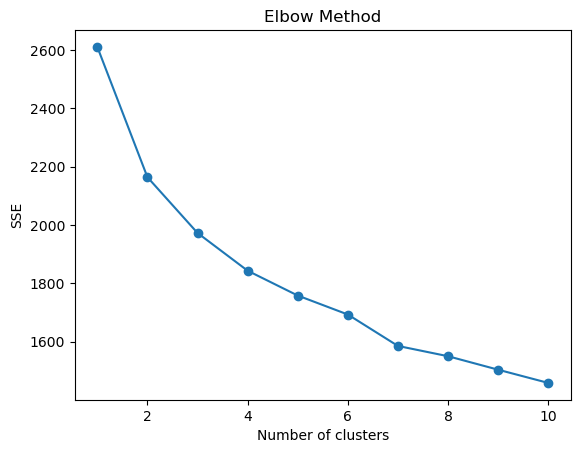

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Define the features for clustering
features = ['Age', 'Gender', 'Location', 'Daily Price','Category']

# Separate numerical and categorical features
numerical_features = ['Daily Price']
categorical_features = ['Age', 'Gender', 'Location','Category']

# Define preprocessing transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = Pipeline(steps=[('preprocessor', preprocessor),
                             ('clusterer', KMeans(n_clusters=k, random_state=42))])
    kmeans.fit(df[features])
    sse.append(kmeans.named_steps['clusterer'].inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

C:\Users\Asad\AppData\Local\Temp\ipykernel_3700\788855980.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = df.groupby('Cluster').mean()


         Daily Price    Gender  Location        Age   Category
Cluster                                                       
0          18.044025  1.018750  2.725000  23.793750  14.787500
1          18.641587  1.077519  3.000000  24.596899  14.096899
2         108.653623  1.014493  2.811594  22.405797  14.043478
Silhouette Score: 0.10895005819102009


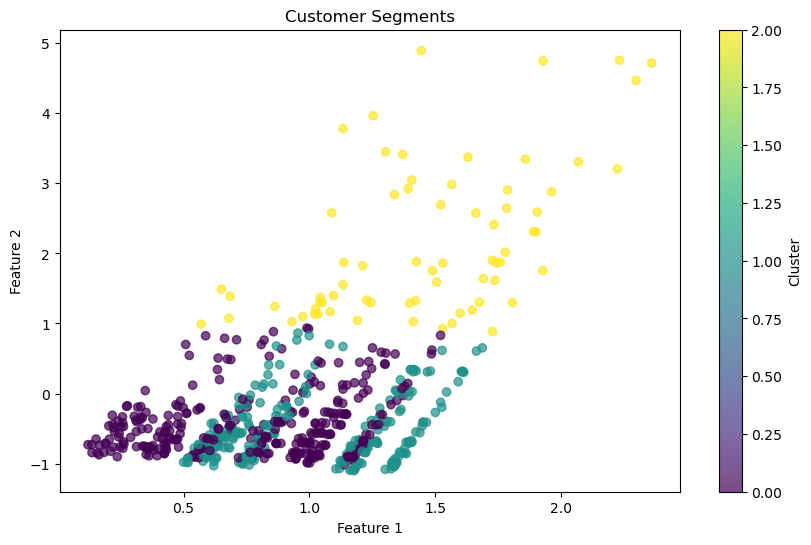

In [20]:
# Apply k-means clustering with 3 clusters
optimal_clusters = 3
kmeans_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('clusterer', KMeans(n_clusters=optimal_clusters, random_state=42))])
df['Cluster'] = kmeans_pipeline.fit_predict(df[features])

# Analyze the clusters
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)

# Calculate silhouette score
X_transformed = preprocessor.fit_transform(df[features])
sil_score = silhouette_score(X_transformed, df['Cluster'])
print(f'Silhouette Score: {sil_score}')

# Visualize clusters using TruncatedSVD to reduce dimensions to 2D
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_transformed)

plt.figure(figsize=(10, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Customer Segments')
plt.colorbar(label='Cluster')
plt.show()